In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
# print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state=7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [6]:
# 多输入
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_deep)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output =  keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_wide, input_deep], outputs=[output])

model.summary()
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(0.001))
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "functional_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           210         input_4[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
_______________________________________________________________________________________

In [7]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history = model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train,
                   validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                   epochs=100,
                   callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 0s 760us/step - loss: 1.9006 - val_loss: 0.9517
Epoch 2/100
363/363 [==============================] - 0s 481us/step - loss: 0.7410 - val_loss: 0.7221
Epoch 3/100
363/363 [==============================] - 0s 473us/step - loss: 0.6421 - val_loss: 0.6776
Epoch 4/100
363/363 [==============================] - 0s 473us/step - loss: 0.5998 - val_loss: 0.6400
Epoch 5/100
363/363 [==============================] - 0s 474us/step - loss: 0.5702 - val_loss: 0.6074
Epoch 6/100
363/363 [==============================] - 0s 474us/step - loss: 0.5467 - val_loss: 0.5828
Epoch 7/100
363/363 [==============================] - 0s 470us/step - loss: 0.5282 - val_loss: 0.5729
Epoch 8/100
363/363 [==============================] - 0s 470us/step - loss: 0.5144 - val_loss: 0.5494
Epoch 9/100
363/363 [==============================] - 0s 470us/step - loss: 0.5023 - val_loss: 0.5347
Epoch 10/100
363/363 [==============================] - 0s 470us/step - l

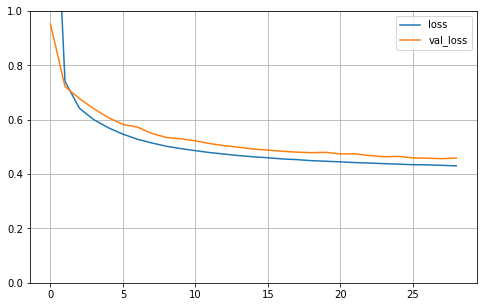

In [8]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [9]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

162/162 [==============================] - 0s 320us/step - loss: 0.4436


0.4435853064060211